In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from google.colab import files 
import io

In [3]:
uploaded=files.upload()


Saving CraftBeer.csv to CraftBeer.csv


In [8]:
data=pd.read_csv(io.BytesIO(uploaded['CraftBeer.csv']))
data

,date,Relative Interest
0,2010-01,6
1,2010-02,9
2,2010-03,15
3,2010-04,12
4,2010-05,17
...,...,...
67,2015-08,84
68,2015-09,75
69,2015-10,66
70,2015-11,66


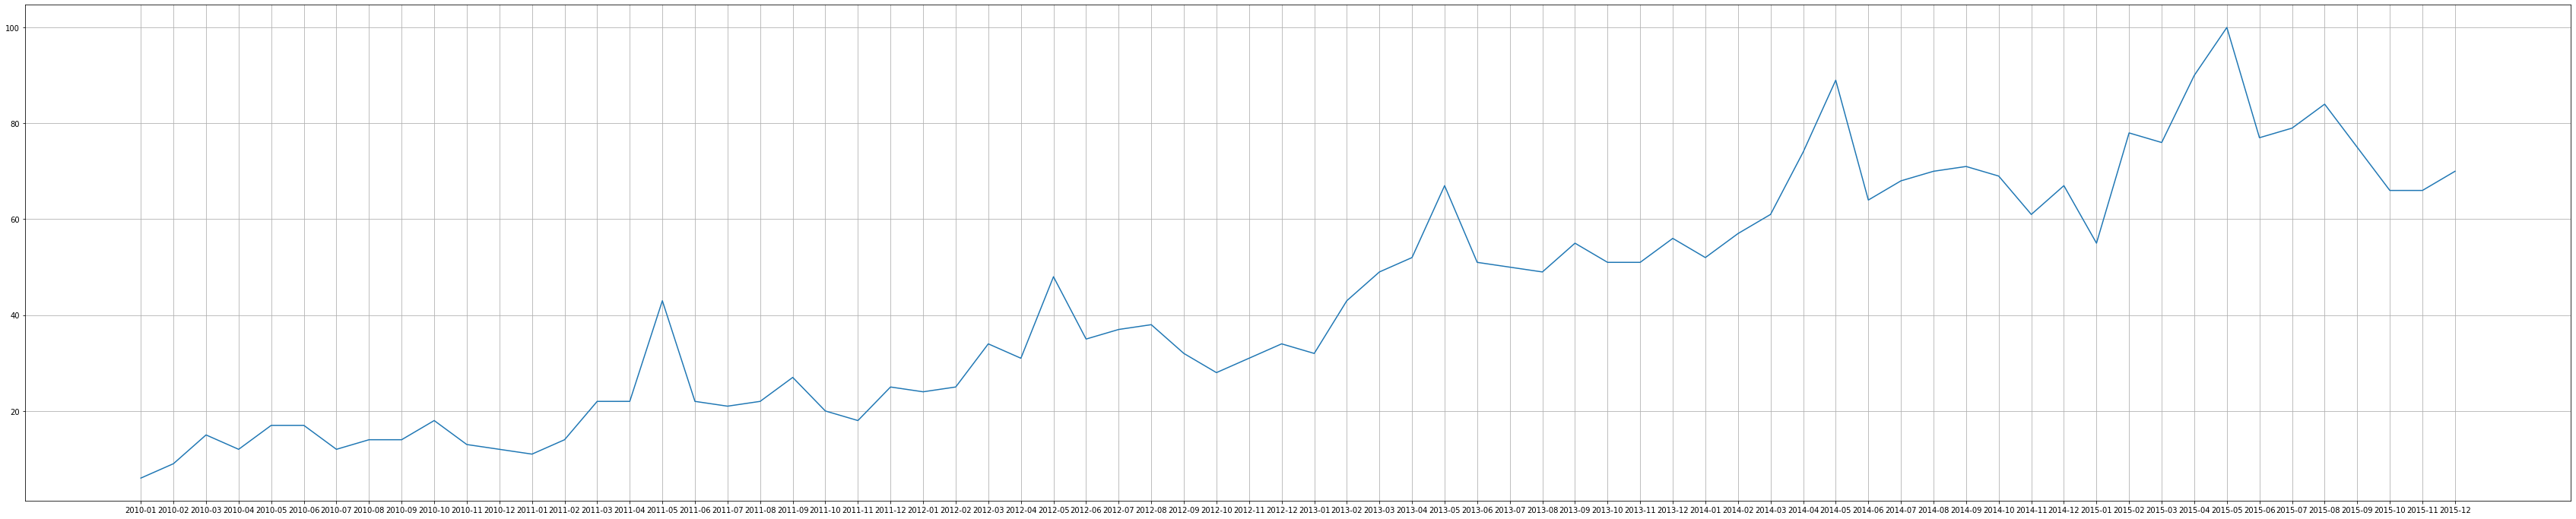

In [14]:
plt.figure(figsize=(60, 12))
plt.plot(data['date'], data['Relative Interest'])
plt.grid()
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller

In [17]:
adfuller(data['Relative Interest']) # Null --> None Stationary

(-0.01603216540874798,
 0.9571859840134868,
 12,
 59,
 {'1%': -3.5463945337644063,
  '5%': -2.911939409384601,
  '10%': -2.5936515282964665},
 388.50173491905474)

In [18]:
data['Relative Interest'] = np.log(data['Relative Interest'])

In [19]:
adfuller(data['Relative Interest'])

(-3.5705399187596463,
 0.0063498712189366344,
 12,
 59,
 {'1%': -3.5463945337644063,
  '5%': -2.911939409384601,
  '10%': -2.5936515282964665},
 -56.11644025202608)

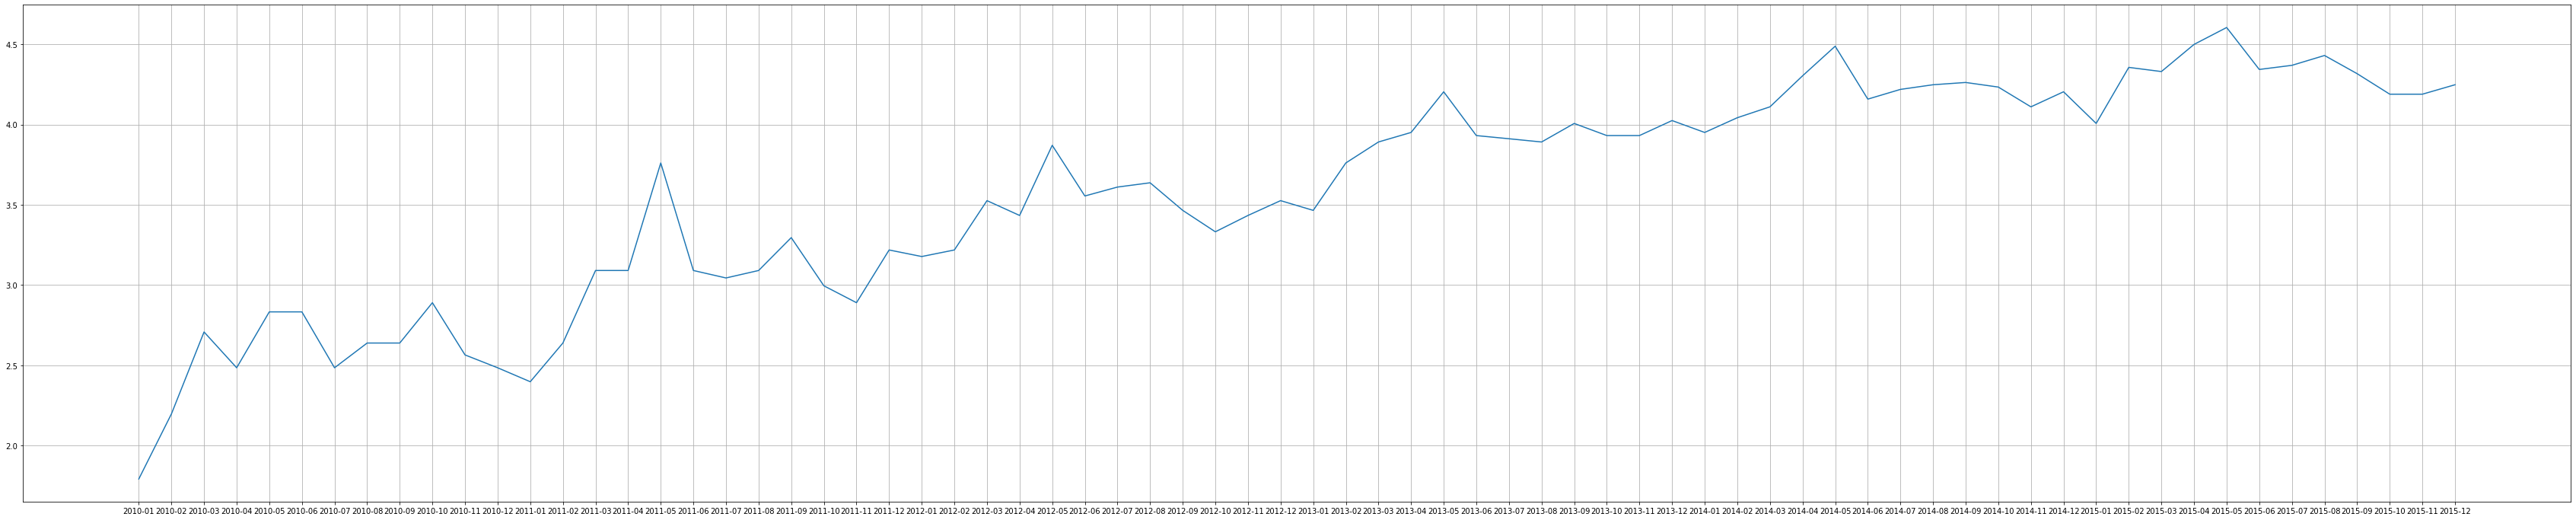

In [20]:
plt.figure(figsize=(60, 12))
plt.plot(data['date'], data['Relative Interest'])
plt.grid()
plt.show()

In [21]:
#by diffult diff() = diff (1)
data['Relative Interest'] = data['Relative Interest'].diff()

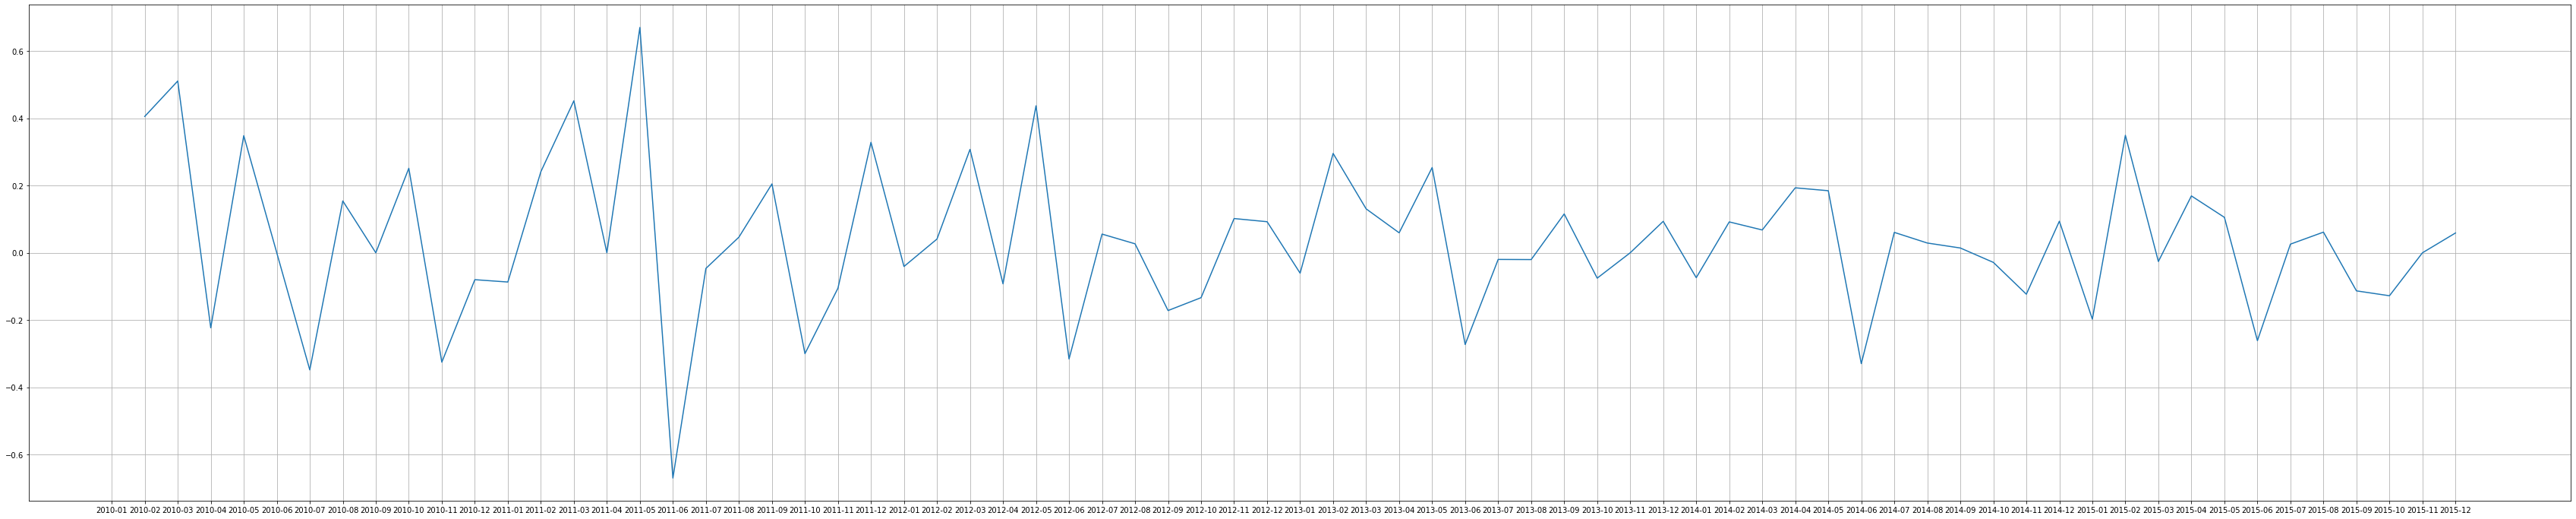

In [22]:
plt.figure(figsize=(60, 12))
plt.plot(data['date'], data['Relative Interest'])
plt.grid()
plt.show()

In [23]:
#now adfuller is less than 0.05 and when we look at the figure we see that data is stationary
data = data.drop(data.index[0])
adfuller(data['Relative Interest'])

(-2.602791141528761,
 0.09242176634927918,
 11,
 59,
 {'1%': -3.5463945337644063,
  '5%': -2.911939409384601,
  '10%': -2.5936515282964665},
 -41.406541276774234)

In [24]:
data['Relative Interest'] = data['Relative Interest'].diff(4)

In [25]:
data

,date,Relative Interest
1,2010-02,NaN
2,2010-03,NaN
3,2010-04,NaN
4,2010-05,NaN
5,2010-06,-0.405465
...,...,...
67,2015-08,-0.107707
68,2015-09,-0.218689
69,2015-10,0.133531
70,2015-11,-0.025642


In [26]:
data = data.drop([1, 2, 3, 4], axis=0)
adfuller(data['Relative Interest'])

(-7.178363853806739,
 2.6900241961278593e-10,
 10,
 56,
 {'1%': -3.552928203580539,
  '5%': -2.9147306250000002,
  '10%': -2.595137155612245},
 -55.813017567968814)

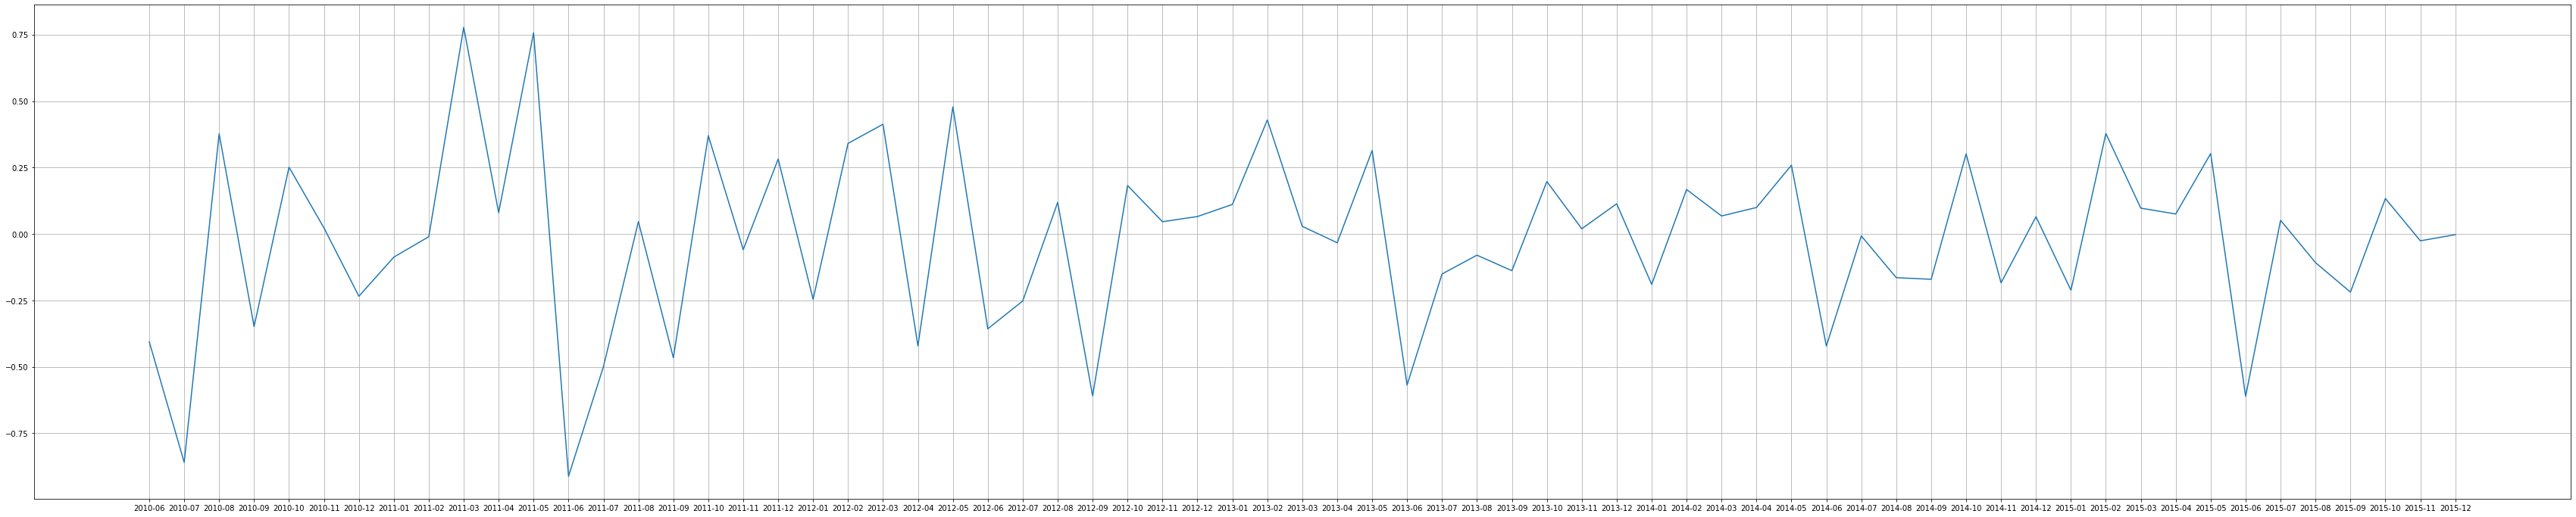

In [27]:
plt.figure(figsize=(60, 12))
plt.plot(data['date'], data['Relative Interest'])
plt.grid()
plt.show()

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [29]:
data2=pd.read_csv(io.BytesIO(uploaded['CraftBeer.csv']))
data2

,date,Relative Interest
0,2010-01,6
1,2010-02,9
2,2010-03,15
3,2010-04,12
4,2010-05,17
...,...,...
67,2015-08,84
68,2015-09,75
69,2015-10,66
70,2015-11,66


In [30]:
model = SARIMAX(data2['Relative Interest'], order=(3, 1, 3), seasonal_order=(2, 1, 2, 4))

In [31]:
res = model.fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [32]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                      Relative Interest   No. Observations:                   72
Model:             SARIMAX(3, 1, 3)x(2, 1, [1, 2], 4)   Log Likelihood                -214.331
Date:                                Sun, 06 Nov 2022   AIC                            450.662
Time:                                        05:45:03   BIC                            474.914
Sample:                                             0   HQIC                           460.259
                                                 - 72                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2169      0.155     -7.856      0.000      -1.520      -0.913
ar.L2         -0.0550      0.235     -0.234      0.815      -0.516       0.406
ar.L3          0.5332      0.122      4.385      0.000       0.295       0.772
ma.L1          0.7298      8.142      0.090      0.929     -15.229      16.688
ma.L2         -0.7472     14.109     -0.053      0.958     -28.400      26.905
ma.L3         -0.9819      8.029     -0.122      0.903     -16.718      14.754
ar.S.L4       -0.9580      0.094    -10.191      0.000      -1.142      -0.774
ar.S.L8       -0.9250      0.080    -11.599      0.000      -1.081      -0.769
ma.S.L4        0.3306      0.210      1.572      0.116      -0.082       0.743
ma.S.L8        0.2598      0.210      1.235      0.217      -0.152       0.672
sigma2        27.2817    223.232      0.122      0.903    -410.246     464.809
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 2.31
Prob(Q):                              0.72   Prob(JB):                         0.32
Heteroskedasticity (H):               1.53   Skew:                             0.24
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
data2['sarimax'] = res.fittedvalues

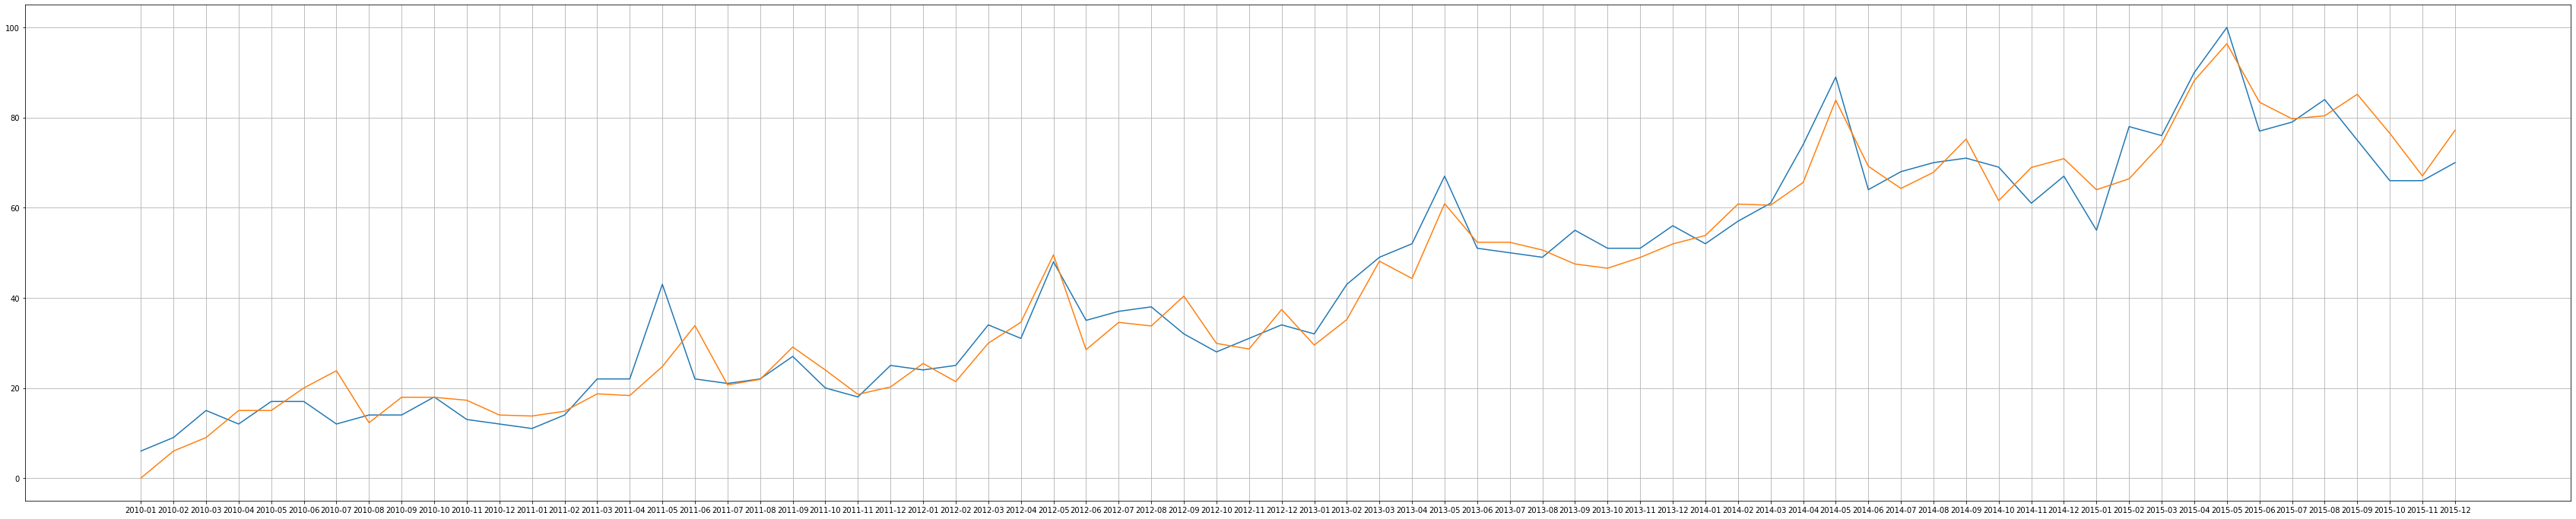

In [35]:
plt.figure(figsize=(60, 12))
plt.plot(data2['date'], data2['Relative Interest'])
plt.plot(data2['date'], data2['sarimax'])
plt.grid()
plt.show()

In [37]:
forecast = res.predict(start=len(data2), end=len(data2) + 8)
forecast = data2['sarimax'].append(forecast)

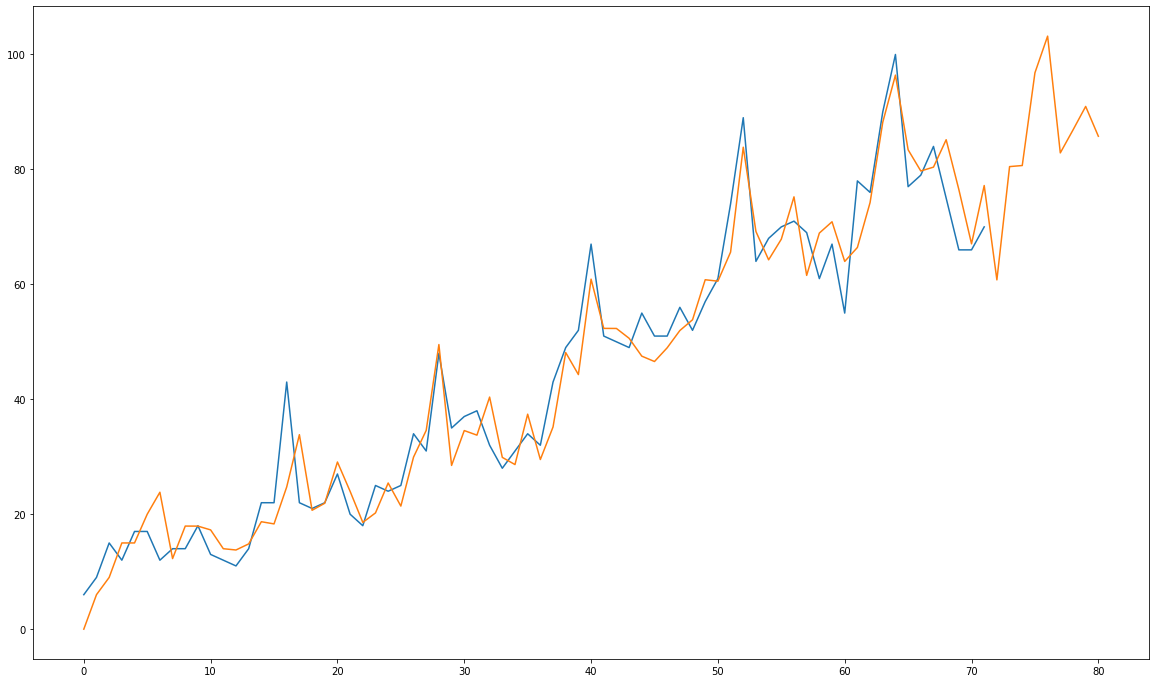

In [38]:
plt.figure(figsize=(20, 12))
plt.plot(data2['Relative Interest'])
plt.plot(forecast)
plt.show()

In [39]:
from itertools import product
p = range(0, 2, 1)
d = 1
q = range(0, 2, 1)
ps = range(0, 2, 1)
ds = 1
qs = range(0, 2, 1)
s = 4
params = list(product(p, q, ps, qs))
params

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (1, 0, 0, 0),
 (1, 0, 0, 1),
 (1, 0, 1, 0),
 (1, 0, 1, 1),
 (1, 1, 0, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 1, 1)]

In [40]:
results = []
for order in params:
    try:
        model = SARIMAX(data2['Relative Interest'], order=(order[0], d, order[1]), seasonal_order=(order[2], ds, order[3], s))
        res = model.fit()
        results.append([order, res.aic])
    except:
        continue


In [41]:
r = pd.DataFrame(results)
r.columns = ('order', 'AIC')
r.sort_values(by='AIC', ascending=True)

,order,AIC
11,"(1, 0, 1, 1)",483.240024
7,"(0, 1, 1, 1)",483.387802
15,"(1, 1, 1, 1)",485.174226
9,"(1, 0, 0, 1)",485.371573
5,"(0, 1, 0, 1)",485.884805
13,"(1, 1, 0, 1)",487.364364
3,"(0, 0, 1, 1)",490.149973
1,"(0, 0, 0, 1)",491.493506
10,"(1, 0, 1, 0)",517.575051
6,"(0, 1, 1, 0)",518.630339


In [42]:
model = SARIMAX(data2['Relative Interest'], order=(1, 1, 1), seasonal_order=(0, 1, 0, 4))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                  Relative Interest   No. Observations:                   72
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 4)   Log Likelihood                -264.476
Date:                            Sun, 06 Nov 2022   AIC                            534.952
Time:                                    05:55:10   BIC                            541.566
Sample:                                         0   HQIC                           537.569
                                             - 72                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3476      0.459     -0.758      0.449      -1.247       0.551
ma.L1          0.0236      0.476      0.050      0.960      -0.910       0.957
sigma2       156.8436     30.257      5.184      0.000      97.540     216.147
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.42
Prob(Q):                              0.97   Prob(JB):                         0.49
Heteroskedasticity (H):               2.82   Skew:                            -0.35
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
forecast = res.predict(start=len(data2), end=len(data2) + 8)
forecast = data2['sarimax'].append(forecast)

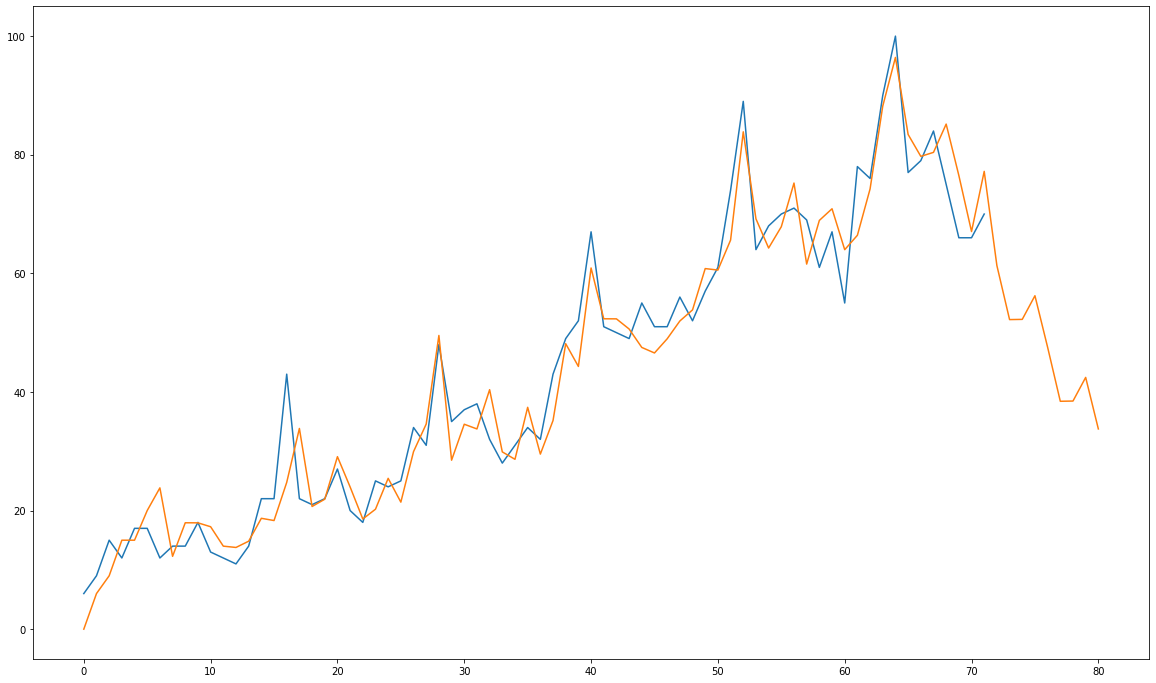

In [45]:
plt.figure(figsize=(20, 12))
plt.plot(data2['Relative Interest'])
plt.plot(forecast)
plt.show()